In [1]:
%run pylib/summary dark 
self = Summary(  title="""Appply KDE to GU candidates.""")
df = self.df.copy()
df['flux_ratio'] = df.log_fpeak-df.diffuse


# Appply KDE to GU candidates.

<h5 style="text-align:right; margin-right:15px"> 2023-10-26 05:01</h5>

* Read file `files/fgl_summary.csv` with 2625 sources.

## KDE analysis 
vars: ['log_epeak', 'log_fpeak', 'd', 'diffuse']

<ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f128ea2b280>
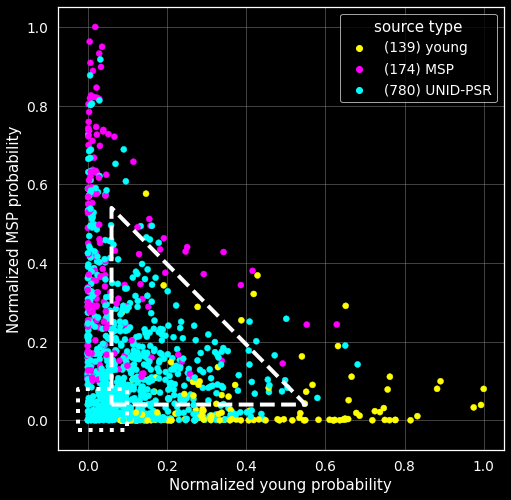

Selected 478 of the UNID-PSR sources inside the square and triangular regions

In [4]:
%run pylib/kde
kde_analysis(df)

In [ ]:
# def kde_analysis(df):
#     def kde_check(cols = 'log_epeak log_fpeak d diffuse'.split()):
#         tdf = df.copy()
#         for t in 'young MSP'.split():
#             gde = Gaussian_kde( df[df['source type']==t],  cols)
#             arg ='pdf_'+t
#             u = gde(df)
#             tdf[arg] = u/np.max(u)
        
#         fig, ax = plt.subplots(figsize=(8,8))
#         size_kw = dict(size='log TS', sizes=(20,100) )
#         hue_kw = dict(hue='source type', hue_order='young MSP UNID-PSR'.split(),
#                      palette='yellow magenta cyan'.split(), edgecolor=None)
#         x,y =tdf.pdf_young, tdf.pdf_MSP
#         sns.scatterplot(tdf, ax=ax,  x=x, y=y,  **hue_kw)#, **size_kw);
#         update_legend(ax, df, hue='source type' )
#         ax.set(xlabel='Normalized young probability', ylabel='Normalized MSP probability')
#         show(f"""## KDE analysis 
#             vars: {cols}""")
#         return ax, tdf
#     ax, df = kde_check('log_epeak log_fpeak d diffuse'.split())
    
#     class Triangle:
#         def __init__(self, ax, x=(0.06,0.55), y=(0.04, 0.54)):
#             a,b = x
#             c,d = y
#             alpha = (c-d)/(b-a)
#             beta = c-alpha*b
#             # inside is in the triangle or rectangle at origin
#             self.inside = lambda x,y: ((x>a) & (y>c)  & (y < alpha*x+beta ))  | ((x<a) & (y<c))
#             ax.plot([a,b,a,a], [c,c,d, c], '--', color='1.', lw=4)
    
#         def __call__(self, df, x, y):
#             return self.inside(df[x],df[y])     
#     class Square(Triangle):
#         def __init__(self, ax, a=0.1, b=0.08):
#             z=-0.025
#             self.inside =  lambda x,y: (x<a) & (y<b)
#             ax.plot([z, a, a, z, z] , [z, z, b,b,z], ':', color='1.', lw=4)
    
#     t = Triangle(ax)
#     s = Square(ax)
#     show(ax.figure)
#     pars =df[df['source type']=='UNID-PSR'],  'pdf_young', 'pdf_MSP' 
#     q = t(*pars) | s(*pars)
#     show(f'Selected {sum(q)} of the UNID-PSR sources inside the square and triangular regions')

In [ ]:
show(f"""### Positions of {sum(q)} selected""")
unid_psr = df[df['source type']=="UNID-PSR"].copy()
show(sns.scatterplot(unid_psr[q], x='pdf_young', y='pdf_MSP', color='cyan').figure)

In [ ]:
gu_file = 'files/gu_4fgl_candidates.csv'

unid_psr[q]['glon glat d Fp Ep diffuse pdf_young pdf_MSP'.split()].to_csv(gu_file, float_format='%.3f')
show(f"""* Wrote {sum(q)} GU candidate sources to {gu_file}""")

In [ ]:
show(f"""### Diffuse flux vs $E_p$
Tagged those that have low probability to be pulsars.""")
unid_psr['non-psr'] = q
fig,ax = plt.subplots(figsize=(8,8))
sns.scatterplot(unid_psr, ax=ax, y='diffuse', x='log_epeak', hue='non-psr', palette='0.2 cyan'.split() );
show(ax.figure)

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
sns.scatterplot(unid_psr, ax=ax, x='diffuse', y='flux_ratio', hue='non-psr', palette='0.2 cyan'.split() );
show(ax.figure)

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
sns.scatterplot(unid_psr, ax=ax, y='d', x='log_epeak', hue='non-psr', palette='0.2 cyan'.split() );
show(ax.figure)

In [ ]:
sns.pairplot(unid_psr, vars='log_epeak log_fpeak diffuse d'.split(), hue='non-psr',  palette='0.2 cyan'.split(),)


In [ ]:
from pylib.diffuse import Diffuse
diff = Diffuse()
def fp_vs_diffuse(self):
    fig, ax = plt.subplots(figsize=(8,6))
    size_kw = dict(size='log TS', sizes=(20,150) )
    sns.scatterplot(self.df,ax=ax, x='diffuse',y='log_fpeak', **self.hue_kw, **size_kw );
    plt.legend(loc='upper right', fontsize=12,bbox_to_anchor=(1.1,1.1));
    ax.set(**diff.fluxticks('x'), **fpeak_kw('y'), ylim=(-2,4));
    return fig
show(f"""### Peak flux vs. diffuse """)
show(fp_vs_diffuse(self))

In [ ]:
hkw = self.hue_kw.copy()
ec = hkw.pop('edgecolor', 'none')
#hkw['hue_order']='MSP young'.split()
sns.pairplot(self.df.query('log_epeak<1 & log_fpeak<4'), vars='log_epeak d log_fpeak diffuse'.split(), height=3.5, **hkw,
       plot_kws= dict(edgecolor=ec ));#  palette=self.palette)#'0.2 cyan'.split(),)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
size_kw = dict(size='log TS', sizes=(20,150) )
sns.scatterplot(df,ax=ax, x='diffuse',y=df.log_fpeak-df.diffuse, **self.hue_kw, **size_kw );
plt.legend(loc='upper right', fontsize=12,bbox_to_anchor=(1.05,1.1))
ax.set(**diff.fluxticks('x'));#, **fpeak_kw('y'), ylim=(-2,4));
show(r"""### Log(Fp/diffuse) 
Units are $\log(10^6\ \rm{eV^2\ sr})= 6+\ log(\rm{eV^2\ sr)}$ """)
show(fig)

In [ ]:
def epeak_kw(axis='x', ticks=np.logspace(-1,3,4 )):
    return {axis+'label':'$E_p$  (GeV)',
            axis+'ticks': np.log10(ticks),
            axis+'ticklabels': ticks,
            }
fig, ax = plt.subplots(figsize=(10,6))
size_kw = dict(size='log TS', sizes=(20,150) )
sns.scatterplot(df,ax=ax, x='diffuse',y=df.log_epeak, **self.hue_kw, **size_kw );
plt.legend(loc='upper right', fontsize=12,bbox_to_anchor=(1.05,1.1))
ax.set(**diff.fluxticks('x'), **epeak_kw('y',[0.25,0.5,1,2,4]), ylim=np.log10((0.15, 5)));#, **fpeak_kw('y'), ylim=(-2,4));
show(r"""### Ep vs. diffuse 
 """)
show(fig)

In [ ]:
from pylib.diffuse import *     
diff = Diffuse()
kw = self.hue_kw
kw.pop('edgecolor')
diff.show_diffuse_flux( df[q], self.hue_kw)

In [ ]:
kde_check('log_epeak  d diffuse'.split());

In [ ]:
kde_check('log_epeak log_fpeak  d glon glat'.split());